In [1]:
# https://www.kaggle.com/datasets/robikscube/hourly-energy-consumption
# https://www.youtube.com/watch?v=vV12dGe_Fho
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from tasks.baseline_Kaggle_ClassifyLeaves import train_df

plt.style.use('fivethirtyeight')
COLOR_PAL = sns.color_palette('colorblind')
BASE_DIR = r'../data/kaggle-hourly-energy-consumption'
COLOR_PAL

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [18]:
pjme_df = pd.read_csv(os.path.join(BASE_DIR, 'PJME_hourly.csv'))
pjme_df = pjme_df.set_index('Datetime')
pjme_df.index = pd.to_datetime(pjme_df.index) # dtype: datetime64[ns]
pjme_df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


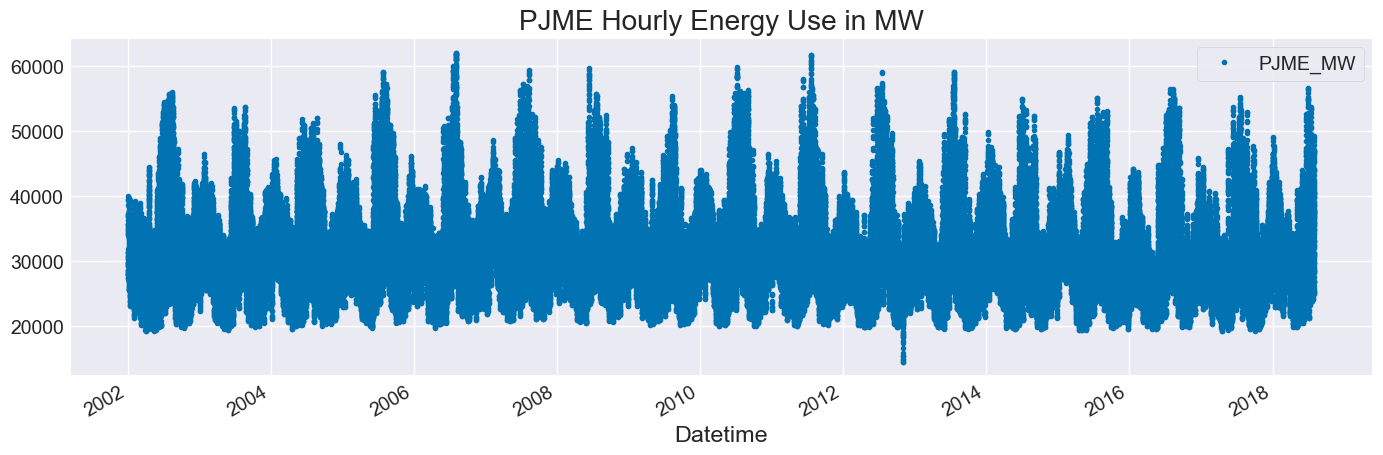

In [19]:
pjme_df.plot(style='.', figsize=(15, 5), color=COLOR_PAL[0], title='PJME Hourly Energy Use in MW')
plt.show()

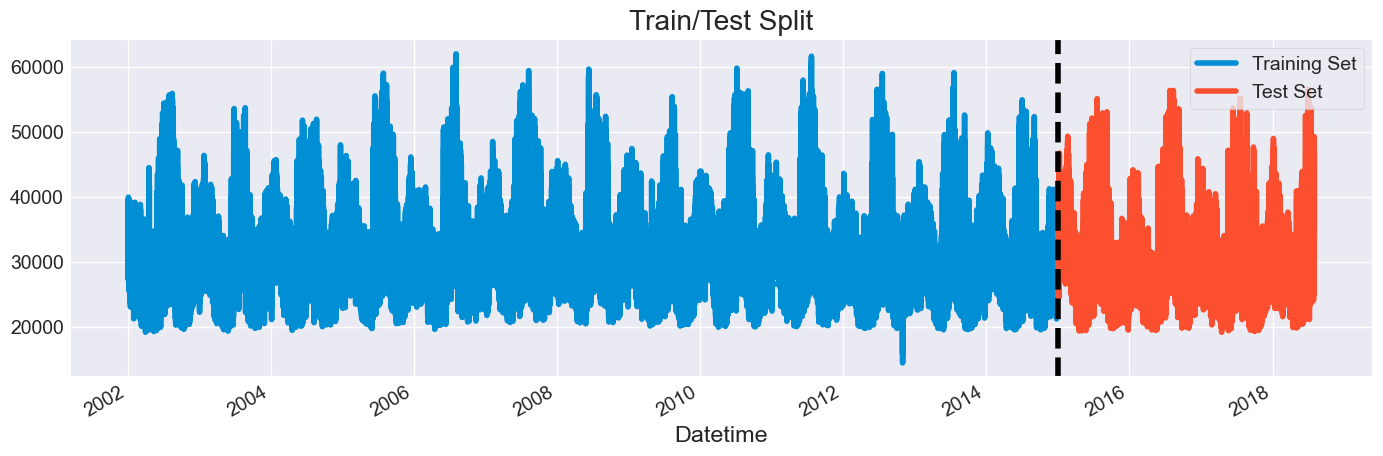

In [20]:
# Spilt the data into train and test sets
day = '01-01-2015'
train = pjme_df.loc[pjme_df.index < day]
test = pjme_df.loc[pjme_df.index >= day]

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline(day, color='black', linestyle='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

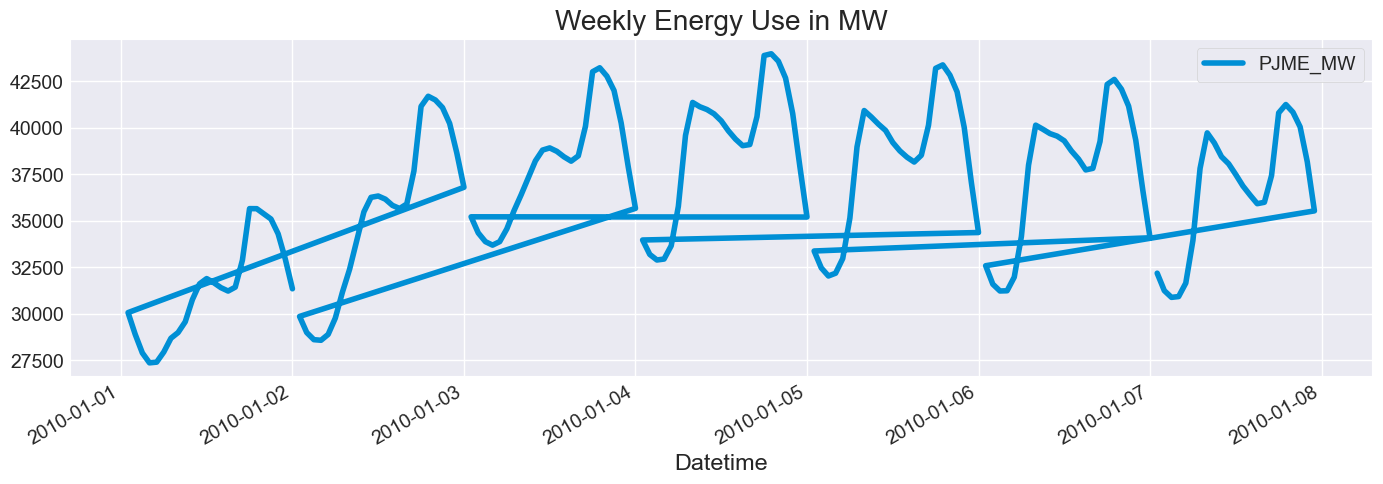

In [23]:
pjme_df.loc[(pjme_df.index > '01-01-2010') & (pjme_df.index < '01-08-2010')].plot(figsize=(15, 5), title='Weekly Energy Use in MW')
plt.show()

In [29]:
# Feature Engineering
pjme_df['hour'] = pjme_df.index.hour
pjme_df['dayofweek'] = pjme_df.index.dayofweek # 0=Monday, 6=Sunday
pjme_df['quarter'] = pjme_df.index.quarter
pjme_df['month'] = pjme_df.index.month
pjme_df['year'] = pjme_df.index.year
pjme_df.head()

,PJME_MW,hours,dayofweek,quarter,month,year,hour
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,2
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,3
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,4
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,5


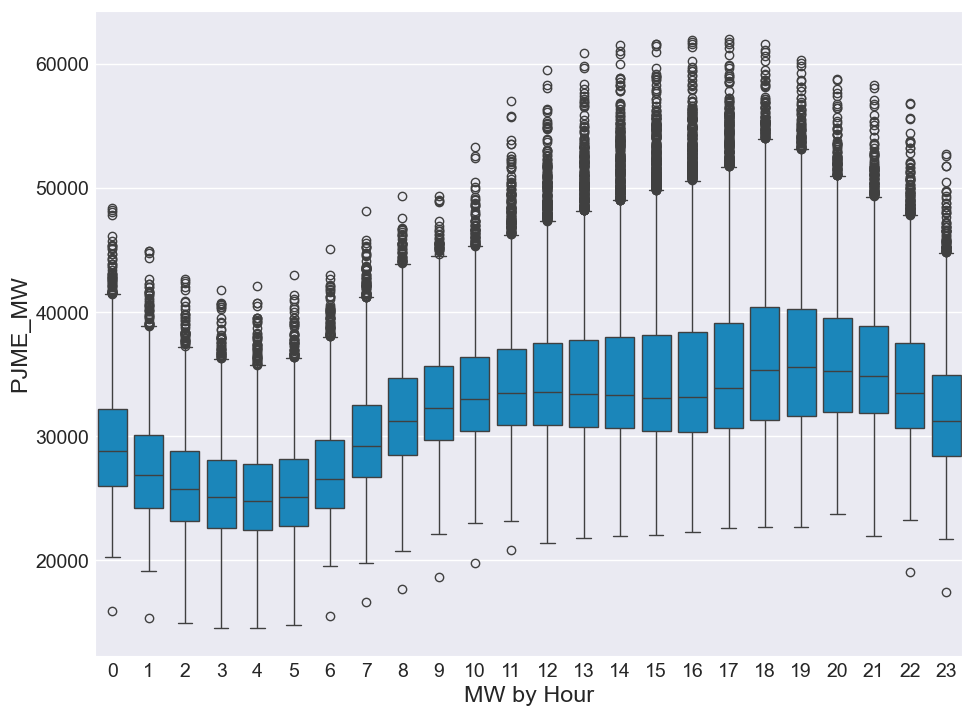

In [30]:
# Visualize the feature-target relationship
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=pjme_df, x='hour', y='PJME_MW')
ax.set_xlabel('MW by Hour')
plt.show()

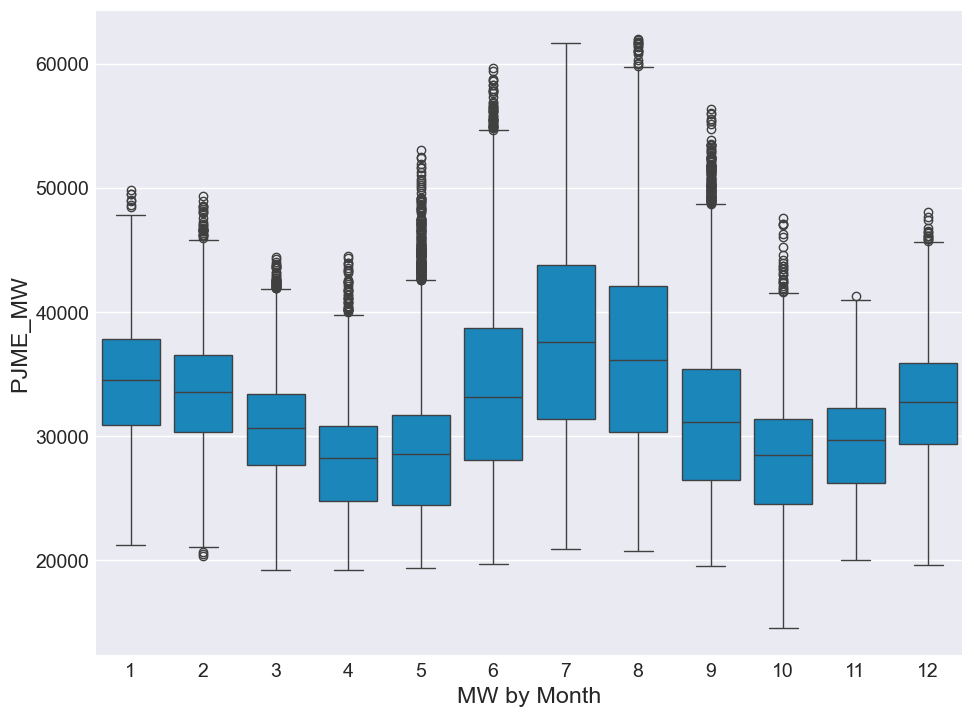

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=pjme_df, x='month', y='PJME_MW')
ax.set_xlabel('MW by Month')
plt.show()

In [35]:
FEATURES = pjme_df.columns.values[1:]
TARGET = 'PJME_MW'
print(FEATURES)

['hours' 'dayofweek' 'quarter' 'month' 'year' 'hour']


In [ ]:
# Model
from sklearn.metrics import mean_squared_error
regressor = xgb.XGBRegressor(n_estimators=1e3,)